In [7]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import scipy
from sklearn import preprocessing

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\__check_build:
setup.py                  _check_build.cp35-win_amd64.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [3]:
# Specify relative path
url = './yelp_dataset/'

# Convert JSON to pandas DataFrame
data = pd.read_json(url + 'business.json', lines=True)

# Filter data by business of interest: Restaurants 
restaurants_filter = data[data['categories'].str.contains("Restaurants") == True]

# Display First 5 instances of filtered data
restaurants_filter.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV


In [4]:
# Check for missing values for filtered data
miss_values = restaurants_filter.isna().sum()

# Display missing values per column 
miss_values
# For general purpose analysis, the columns that contains missing values doesn't need to have your rows excluded
# Futher analysis however can filter those values if necessary

address             0
attributes       2210
business_id         0
categories          0
city                0
hours           13995
is_open             0
latitude            0
longitude           0
name                0
postal_code         0
review_count        0
stars               0
state               0
dtype: int64

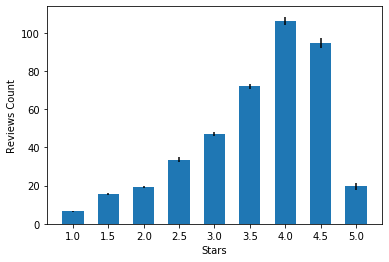

In [5]:
# Check the sparsity between reviews count and stars
# Get the average reviews count per stars category
stars_group = restaurants_filter.groupby('stars').mean().reset_index() 

# Get the SEM of reviews count per stars category
sem_stars_group = restaurants_filter.groupby('stars').sem().reset_index()

# Plot error bar chart of the distribution of reviews count per star category
plt.bar(stars_group['stars'],
        stars_group['review_count'],
        yerr=sem_stars_group['review_count'],
        width=0.3,
        )
plt.xticks(stars_group['stars'])
plt.ylabel("Reviews Count")
plt.xlabel("Stars")
plt.show()